## Why create an environment

Environments are a useful tool for creating transferrable scripts in a world where packages are updated. Perhaps you've had the bug that you and a collaborator share a piece of code, and it doesn't run because a line depends on a package version that you're not using in your base... how do you resolve this conflict without having to modify your existing code? Let's walk through an example with matplotlib. 

What I'm sharing is derived from Conda's webpage on handling environments at this link:
https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#building-identical-conda-environments

In [1]:
import matplotlib as plt

In [2]:
# Matplotlib currently has two stable versions: 3.0.3 and 2.1.2 
# Find out what version you're running

plt.__version__

# Link to Matplotlib's documentation of the upgrades made in 3.0.3: https://matplotlib.org/users/whats_new.html

'2.1.2'

## If you're running 2.1.2, do this example:

AttributeError: module 'matplotlib.cm' has no attribute 'twilight'

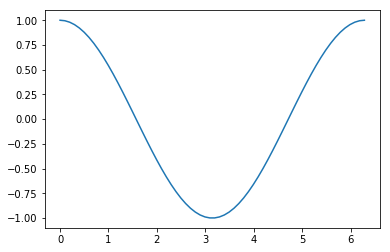

In [8]:
# Currently I run version 2.1.2. But version 3.0.3 has this cool new feature: 

# Cyclic colormaps: Two new colormaps added, one of which is named'twilight'. These start and end on the same color
# and are great for data like phase angle that starts and ends in the same position (0 degrees = 360 degrees)

import numpy as np
import matplotlib.pylab# as pl

x = np.linspace(0, 2*np.pi, 64)
y = np.cos(x) 

plt.pylab.figure()
plt.pylab.plot(x,y)

n = 20
colors = plt.pylab.cm.twilight(np.linspace(0,1,n))

for i in range(n):
    plt.pylab.plot(x, i*y, color=colors[i])
    
# If you ran this with version 2.1.2, you'll get the error  "AttributeError: module 
#'matplotlib.cm' has no attribute 'twilight'" since twilight doesn't exist in version 2.1.2

# Try running this code with a different colormap, like jet

## If you're running 3.0.3 do this example:

# To resolve you're problem, let's create a python environment that has the version of matplotlib that you're not already using. 

## First, check out what environments you have on your machine by typing the following into your shell:
conda info --envs

You may have multiple environments, or only one. Notice that you have one which is called your base. This is the environment that you will default to, and from which other environments derive their properties unless you specify otherwise. 

As an example, my base environment runs Python 2, but one of my environments runs Python 3. 

## Create a new environment with shell
You can do this multiple ways. One way is to create a .yml file -- this is readily shared between users. Another is to manually prescripe in your shell. Let's try both, keeping in mind that you can always delete these test environments when you're done. 

If you just want to create an environment that derives properties from the base: 

In shell type: conda create --name myenv
* note that myenv is just a name you call it -- I used test

If you want to create an environment that uses a specific version of Python and a specific package version:

conda create -n myenv python=3.6 matplotlib=3.0.3

You'll be asked if you're okay with where this environment is being placed -- you'll want it within anaconda/envs

Note version numbers aren't required.

## Did you just get the error that this packages aren't avialable in your current channels? 
matplotlib can be accessed through conda forge. You can add conda-forge as a source from which to access packages.
Note that in the future this is a channel that Python will use to look for new packages. 

Shell prompt: 
config --append channels conda-forge

Try to create your environment again. Likely you'll download and install some pieces to do this. 



## Create a new environment from a .yml file

1) Open up a text editor like Atom. 
    In a new file you'll put this information in:

    name of the environment test_yml
    channels from which to look for packages
    dependencies (the packages and versions that you depend on)

    The formatting is finicky, so see the .yml file I've attched. Save yours as a .yml. Try adding your other favorite package dependency!

2) To create the enviornment from the information in the yml file use the shell prompt: conda env create -f filepath/environment.yml


In [ ]:
# Now you'll want to try running the code that you couldn't with your version of matplotlib earlier.
# Go to open up a new jupyter notebook

## Bash lines to know: 

View environments: 
conda info --envs

Create an environment: 
conda create --name myenv 

Activate/deactivate an environment:
First check what version of conda you're running: conda --version
    - if you're running on a Mac/Linux OS with conda pre 4.6 then you'll use 'source activate/deactivate' rather than activate
    - else use just 'activate' or 'deactivate'
    
Delete an environment:
conda env remove --name myenv
    
    
